<a href="https://colab.research.google.com/github/jidnyasa257/jidnyasa/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 **Jidnyasa Ajit Uparate**

**May-P2 Batch OIB-SIP.**

**Task no- 1**

**IRIS Flower Classification**

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('Iris.csv')
df
del df['Id']
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

<ipython-input-48-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
species_counts = df['Species'].value_counts()
species_counts

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<ipython-input-50-549c26f31d88>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


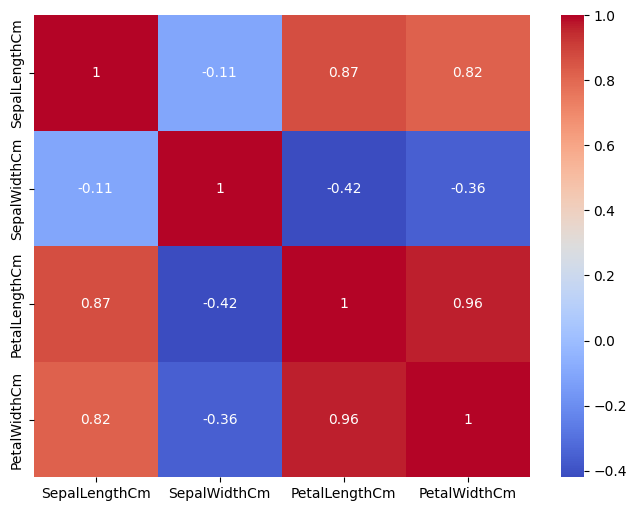

In [ ]:
plt.figure(figsize=(8,6))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()


1)Observe, all the diagonal have value as 1 because the feature will have perfect positive correlation             with itself.
2)As this is classification problem, there is no chance to find the correlation of features with target feature but we can find the possibility of multicollinearity.
3)Considering the petal length and petal width are highly correlated


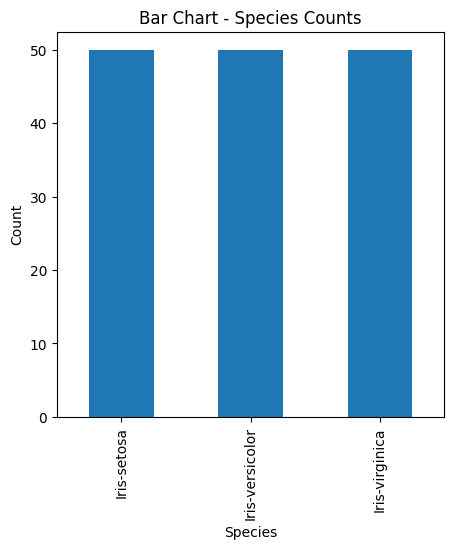

In [ ]:
plt.figure(figsize=(5, 5))
species_counts.plot(kind='bar')
plt.title('Bar Chart - Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


Scatterplot


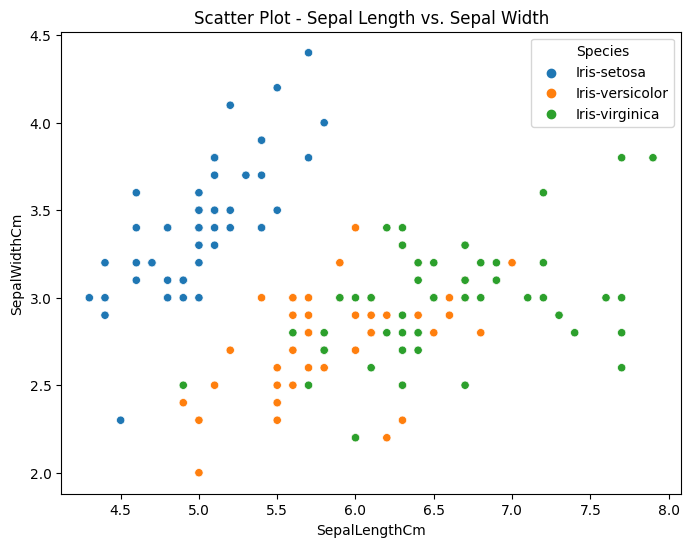

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Scatter Plot - Sepal Length vs. Sepal Width')
plt.show()

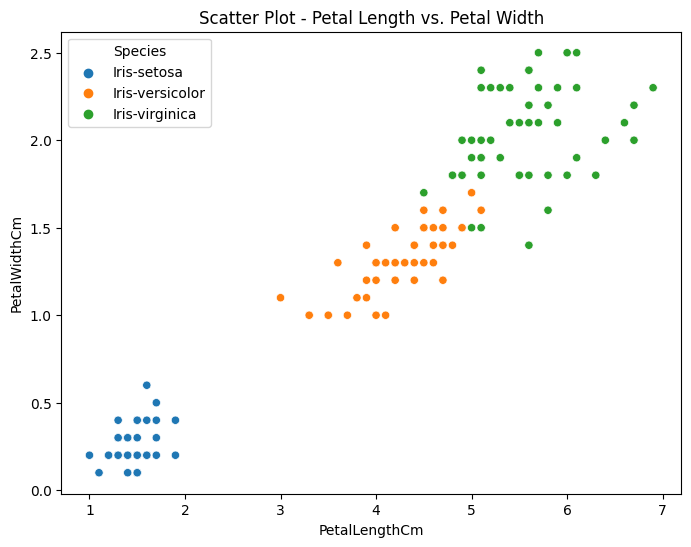

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Scatter Plot - Petal Length vs. Petal Width')
plt.show()

1)Species Setosa has smaller petal lengths and width.
2)Versicolor Species lies in the middle of the other two species in terms of petal length and width
3)Species Virginica has the largest of petal lengths and width.

Line chart

In [ ]:
sepal_length_means = df.groupby('Species')['SepalLengthCm'].mean()

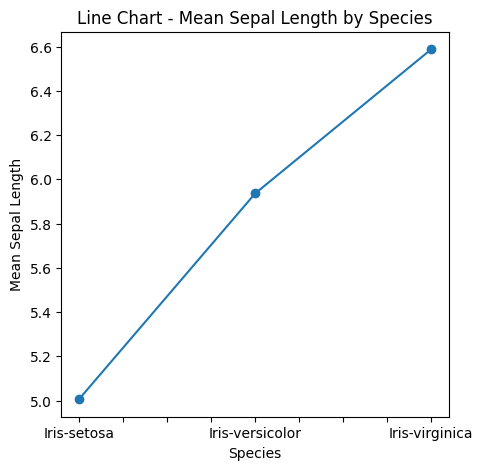

In [ ]:
plt.figure(figsize=(5, 5))
sepal_length_means.plot(kind='line', marker='o')
plt.title('Line Chart - Mean Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Mean Sepal Length')
plt.show()

In [ ]:
import statsmodels.api as sm

<Figure size 500x500 with 0 Axes>

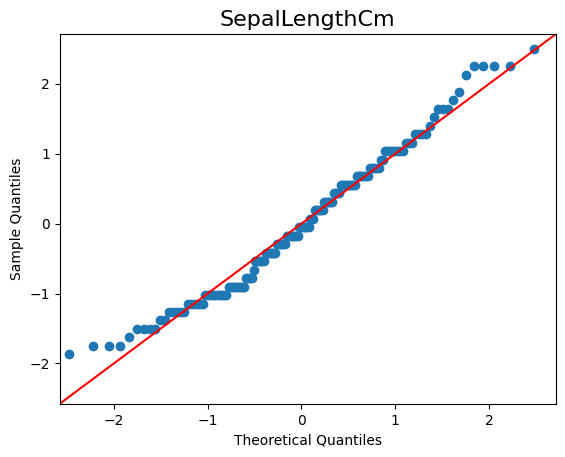

<Figure size 500x500 with 0 Axes>

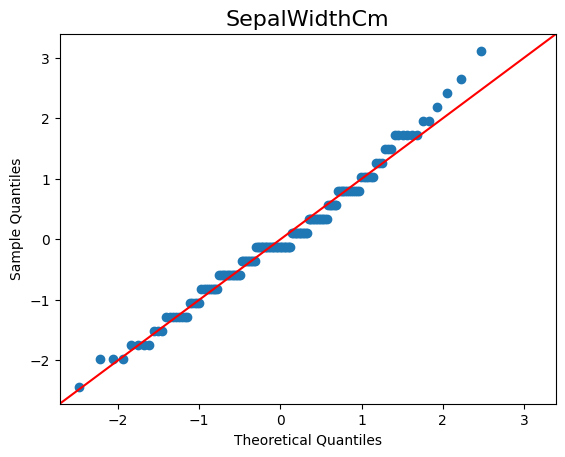

<Figure size 500x500 with 0 Axes>

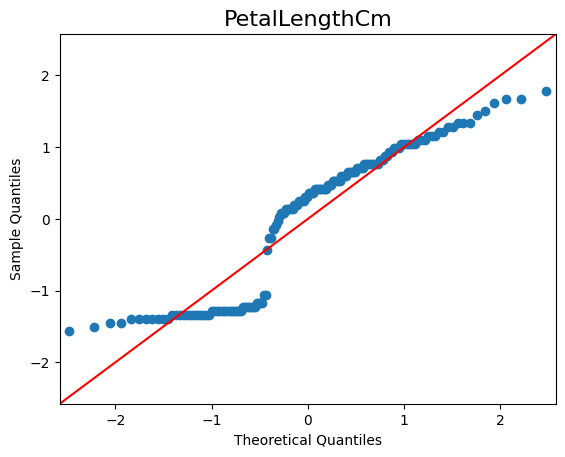

<Figure size 500x500 with 0 Axes>

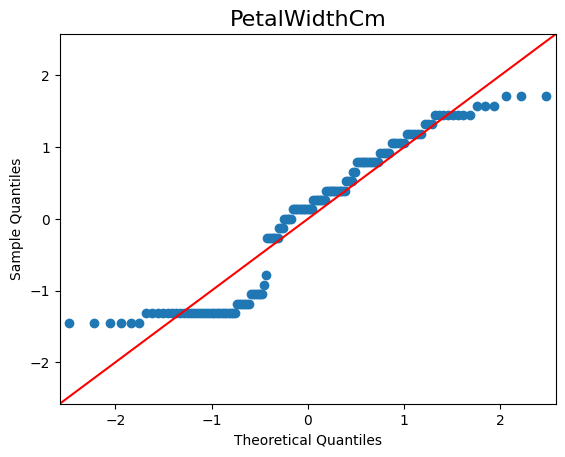

In [ ]:
for col in df.columns:
    if col != 'Species':
        plt.figure(figsize=(5, 5))
        sm.qqplot(df[col], line='45', fit=True)
        plt.title(col, size=16)


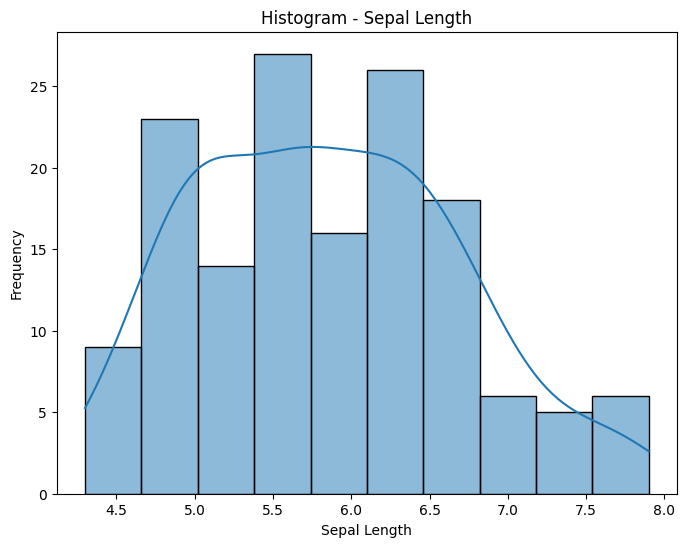

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='SepalLengthCm', bins=10, kde=True)
plt.title('Histogram - Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

The highest frequency of the sepal length is between 20 and 25 which is between

---

5.5 and 6

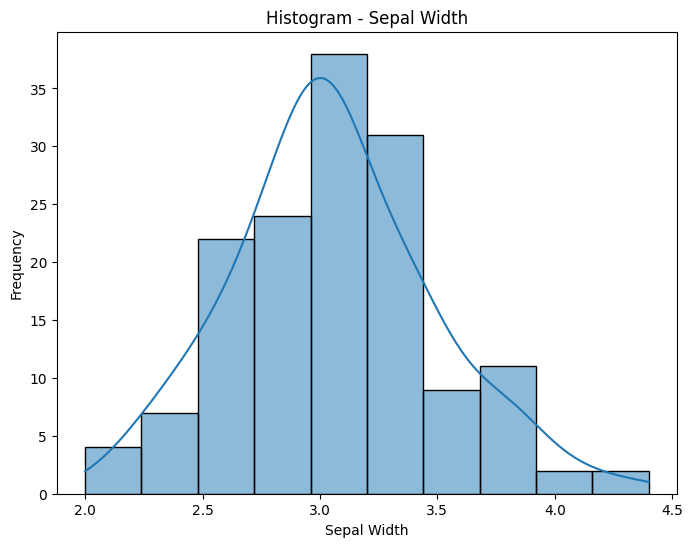

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='SepalWidthCm', bins=10, kde=True)
plt.title('Histogram - Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.show()

The highest frequency of the sepal width is around 35 which is between 3 and 3.5

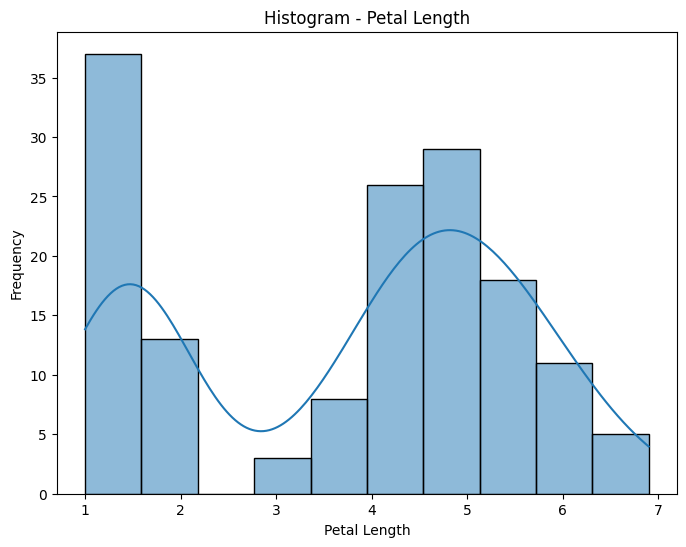

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PetalLengthCm', bins=10, kde=True)
plt.title('Histogram - Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

The highest frequency of the petal length is aorund 35 which is between 1 and 2

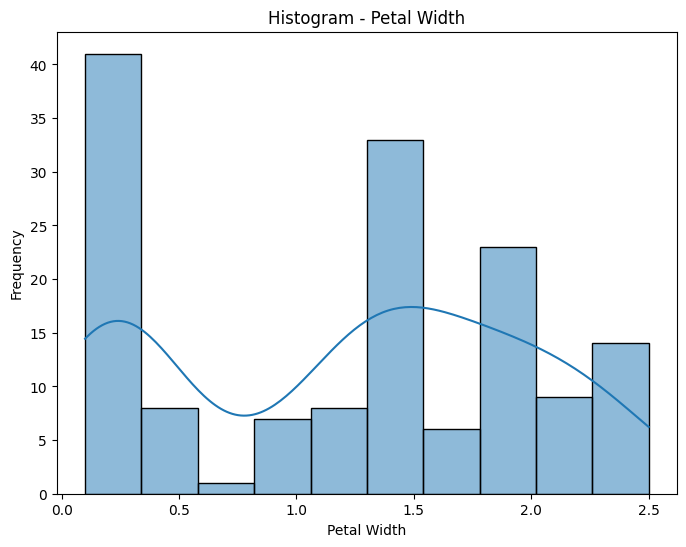

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PetalWidthCm', bins=10, kde=True)
plt.title('Histogram - Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.show()

The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

Pariplot

<Figure size 1000x800 with 0 Axes>

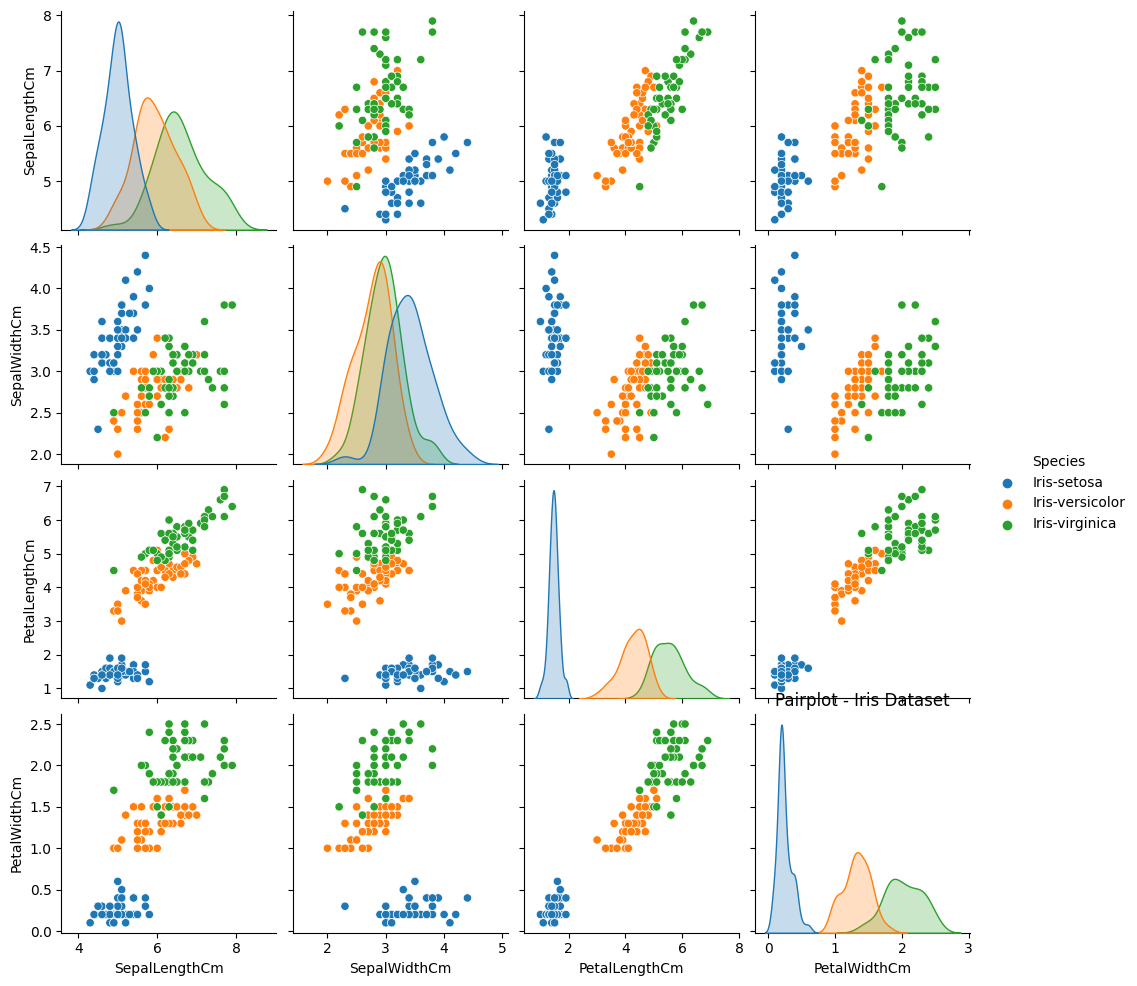

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Species')
plt.title('Pairplot - Iris Dataset')
plt.show()

1)The histogram of petal length and petal width says that the length and width of 'Iris Setosa' is less as compared to other two classes.
2)Therefore, petal length and petal width are important features to classify setosa from other two classes.

Boxplot

Text(0.5, 1.0, 'Boxplot of Features')

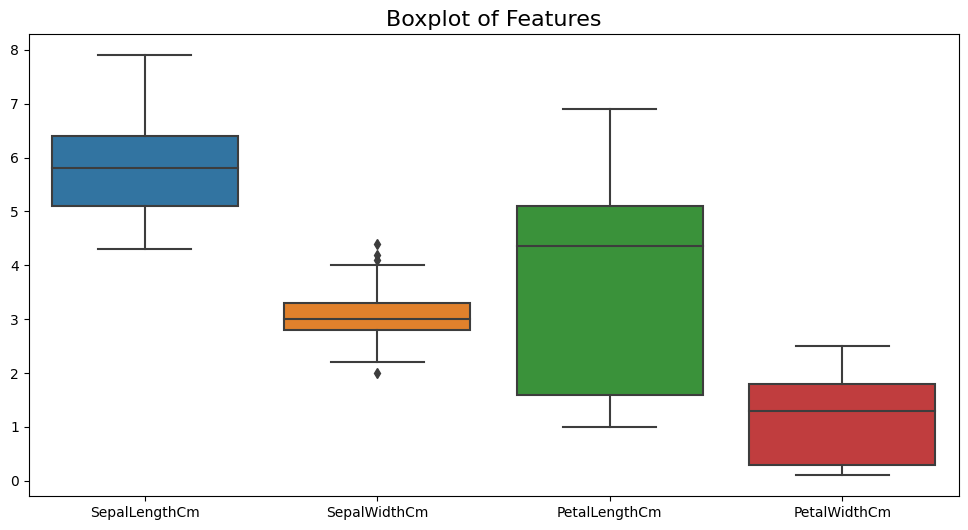

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features', size=16)

1) From positioning of boxplots, it can be interpreted that Petal width has minimum values and sepal length has highest values.
2) From shape of boxplot, the petal length has highest spread i.e. most variance and the sepal width has lest spread  i.e. least variance.

Linear Regression.

In [ ]:

import statsmodels.formula.api as smf
model=smf.ols("SepalLengthCm~SepalWidthCm+PetalLengthCm+PetalWidthCm",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SepalLengthCm   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.0
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           6.28e-62
Time:                        13:25:14   Log-Likelihood:                -37.000
No. Observations:                 150   AIC:                             82.00
Df Residuals:                     146   BIC:                             94.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.8451      0.250      7.368      0.000       1.350       2.340
SepalWidthCm      0.6549      0.067      9.823      0.000       0.523       0.787
PetalLengthCm     0.7111      0.057     12.560      0.000       0.599       0.823
PetalWidthCm     -0.5626      0.127     -4.426      0.000      -0.814      -0.311
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.432
Skew:                           0.003   Prob(JB):                        0.806
Kurtosis:                       2.737   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

accuracy

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["Species"]= le.fit_transform(df["Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=["Species"])
y=df["Species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print('Accuracy:',model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model= KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Accuracy:',model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556
